# Mining Time Series: Classic approach

## Descriptive analysis

### Summaries of time series data

* Standard descriptive statistics (mean, standard deviation, etc.) do not always work with time series (TS) data.
* Time series may contain trends, seasonality and some other systematic components, making these stats misleading.
* This is observational and depends on the data at hand (appraising half a year, year, decade?).


### Types of variation

* **Trends:** A trend is a long-term change in the mean level of the time series. 
  For now, consider the slope between two points.
* **Cycle:** The variation over "large" periods of time.
* **Seasonal:** The variation over "small" periods of time.
* **Other Cyclic Variation:** Some time series have periodic variations that are not related to seasons but to other factors, e.g. some economic time series.

<img src="images/ts_parts.jpg" width="400" />


Consider the annual dry bulb temperature in our dataset:

* **Trend:** Slope between any two points of interest.
* **Cycle:** Seasons in the year.
* **Seasonality:** Daily variation.

In [1]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

# Execute local script with some custom settings
%run -i settings.py  

# Load the data
df_gbr = pd.read_csv('data/london-2018.csv', 
                     index_col=0, parse_dates=True)
df_gbr.head(1)

drybulb  relhum  glohorrad  rainfall  windspd  winddir
2018-01-01 01:00:00     6.28    90.5        0.0  0.122079    10.25   266.82

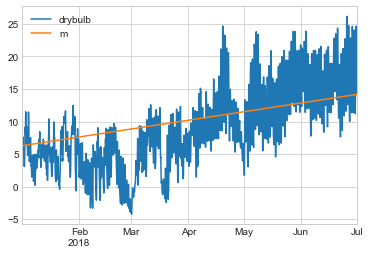

In [2]:
df_sel = df_gbr.loc['2018-01-01 01:00':'2018-07-01 01:00', ['drybulb']]
df_sel['m'] = np.linspace(df_sel.iloc[0], df_sel.iloc[-1], len(df_sel))

fig, ax = plt.subplots()
df_sel.plot(ax=ax)
plt.show()

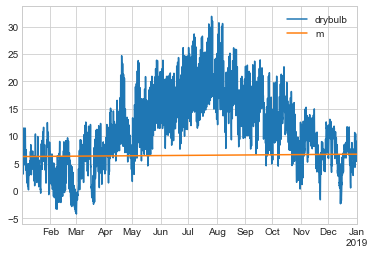

In [3]:
df_sel = df_gbr.loc[:, ['drybulb']]
df_sel['m'] = np.linspace(df_sel.iloc[0], df_sel.iloc[-1], len(df_sel))

fig, ax = plt.subplots()
df_sel.plot(ax=ax)
plt.show()

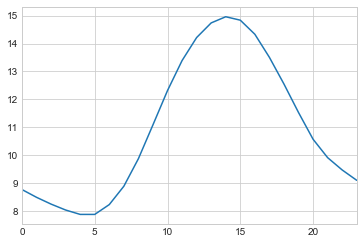

In [4]:
# Average hourly temperature over the year
fig, ax = plt.subplots()
df_gbr['drybulb'].groupby([df_gbr.index.hour]).mean().plot(ax=ax)
plt.show()

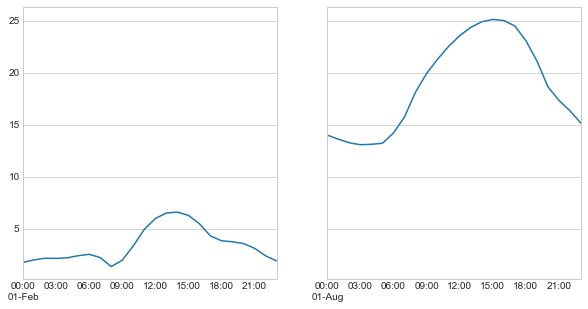

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))
df_gbr.loc['2018-02-01', 'drybulb'].plot(ax=ax0)
df_gbr.loc['2018-08-01', 'drybulb'].plot(ax=ax1)
plt.show()

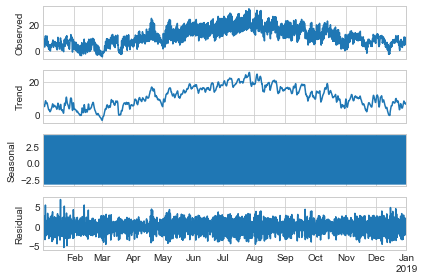

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df_gbr['drybulb'], model='additive').plot()
plt.show()

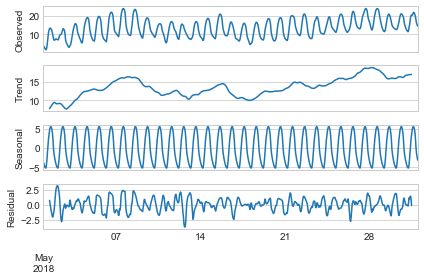

In [7]:
seasonal_decompose(df_gbr.loc['2018-05', 'drybulb'], model='additive').plot()
plt.show()

## Distances

Calculating distances is useful for defining **similarity**.

* At the beginning of the analysis: 
  - Define a notion of similarity.
  - These are used for clustering, classification, motif discovery, rule discovery, query content, novelty detection...
  - This is the case for distances such as:
    - Euclidean distance.
    - Manhattan distance.
    - Mahalanobis.
    - ...    
* At the end of the analysis:
  - Use as a goodness-of-fit tests (between raw data and the model).
  - These distances highlight a particular feature we are interested in the data.
  - This is the case for distances such as:
    - Root Mean Squared Error
    - *many*, *many*, *many* more (see after Euclidean Distance)

### Euclidean Distance

Given 2 time series, $Q = q_1, \ldots q_n$ and $C = c_1, \ldots c_n$, their Euclidean distance is defined as:

$D(Q,C)=\sqrt{\sum_{i=1}^n(q_i-c_i)^2}$

In [8]:
# Load weather data from a different city to compare observations
df_tha = pd.read_csv('data/bangkok-2018.csv', 
                     index_col=0, parse_dates=True)
df_tha.head(1)

drybulb  relhum  glohorrad  rainfall  windspd  winddir
2018-01-01 01:00:00    20.53   84.71   132.6786  0.000349     4.07    38.47

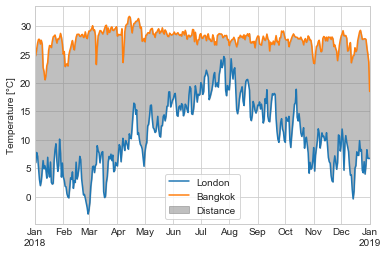

Euclidean (by hand)  : 340.32887
Euclidean (by numpy) : 340.32887


In [9]:
# Prepare data (generate daily means so plots are clearer)
t_gbr = df_gbr['drybulb'].resample('D').mean()
t_tha = df_tha['drybulb'].resample('D').mean()


# Plot
fig, ax = plt.subplots()

t_gbr.plot(ax=ax, legend=True, label='London')
t_tha.plot(ax=ax, legend=True, label='Bangkok')
plt.fill_between(x=t_gbr.index, y1=t_gbr, y2=t_tha, 
                 color='gray', alpha=0.5, label='Distance')

plt.legend(frameon=True, loc='lower center')
plt.ylabel('Temperature [°C]')
plt.show()


# Euclidean distance: intuitively the area (shaded in grey)
def dist_euclidean(a, b):
    return np.sqrt(np.sum(np.square(b - a)))

print(f'Euclidean (by hand)  : {dist_euclidean(t_gbr, t_tha):.5f}')
print(f'Euclidean (by numpy) : {np.linalg.norm(t_gbr - t_tha).sum():.5f}')

### Other distances

* Given to time series (e.g. two vectors) $a, b$.

#### Total bias
$ value = \sum\limits_{i=1}^{n} a_i - b_i $

#### Total Error
$ value = \sum\limits_{i=1}^{n} |a_i - b_i| $

#### Mean Bias
$ value = \frac{1}{n} \sum\limits_{i=1}^{n} a_i - b_i $

#### Mean Bias Error
$ value = \frac{\sum\limits_{i=1}^{n} a_i - b_i}{\sum\limits_{i=1}^{n} a_i} $

#### Mean normalized error
$ value = \frac{1}{n} \sum\limits_{i=1}^{n} \frac{a_i - b_i}{a_i} $

#### Normalized mean bias error
$ value = \frac{\frac{1}{n} \sum\limits_{i=1}^{n} a_i - b_i}{\overline{a}} $

#### Root mean squared error
$ value = \sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (a_i - b_i)^2} $

#### Coefficient of variation of the root mean squared error
$ value = \frac{\sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (a_i - b_i)^2}}{\overline{a}} $

#### $R^2$
$ value = 1 - \frac{\sum\limits_{i=1}^{n} (a_i - b_i)^2}{\sum\limits_{i=1}^{n} (a_i - \overline{a})^2} $

#### Index of Agreement
$ value = 1 - \frac{\sum\limits_{i=1}^{n} (a_i - b_i)^2}{\sum\limits_{i=1}^{n} (|b_i - \overline{a}| + |a_i - \overline{a}|)^2} $


In [10]:
%run -i distances.py  # Defines the "report function"

In [11]:
# Best case scenario: compare against the same series!
report(a=t_gbr, b=t_gbr, unit='°C')

value unit
total bias                    0.0   °C
total error                   0.0   °C
mean bias                     0.0   °C
mean bias error               0.0    -
mean normalized error         0.0    -
normalized mean bias error    0.0    -
root mean squared error       0.0   °C
cv rmse                       0.0    -
rsquared                      1.0    -
index_of_agreement            1.0    -

In [12]:
# Comparing two series
report(a=t_gbr, b=t_tha, unit='°C')

value unit
total bias                 -6137.741467   °C
total error                 6137.741467   °C
mean bias                    -16.769785   °C
mean bias error               -1.533421    -
mean normalized error          2.557763    -
normalized mean bias error    -1.533421    -
root mean squared error       17.789275   °C
cv rmse                        1.626642    -
rsquared                      -7.473886    -
index_of_agreement             0.359816    -

## Dynamic Time Warping (DTW)

In time series analysis, dynamic time warping (DTW) is one of the algorithms for measuring similarity between two temporal sequences, which may vary in speed
[Wikipedia](https://en.wikipedia.org/wiki/Dynamic_time_warping).

It is an **elastic** adjustment ([Elena Tsiporkova](http://www.mathcs.emory.edu/~lxiong/cs730_s13/share/slides/searching_sigkdd2012_DTW.pdf)):

![DTW](images/dtw.png)

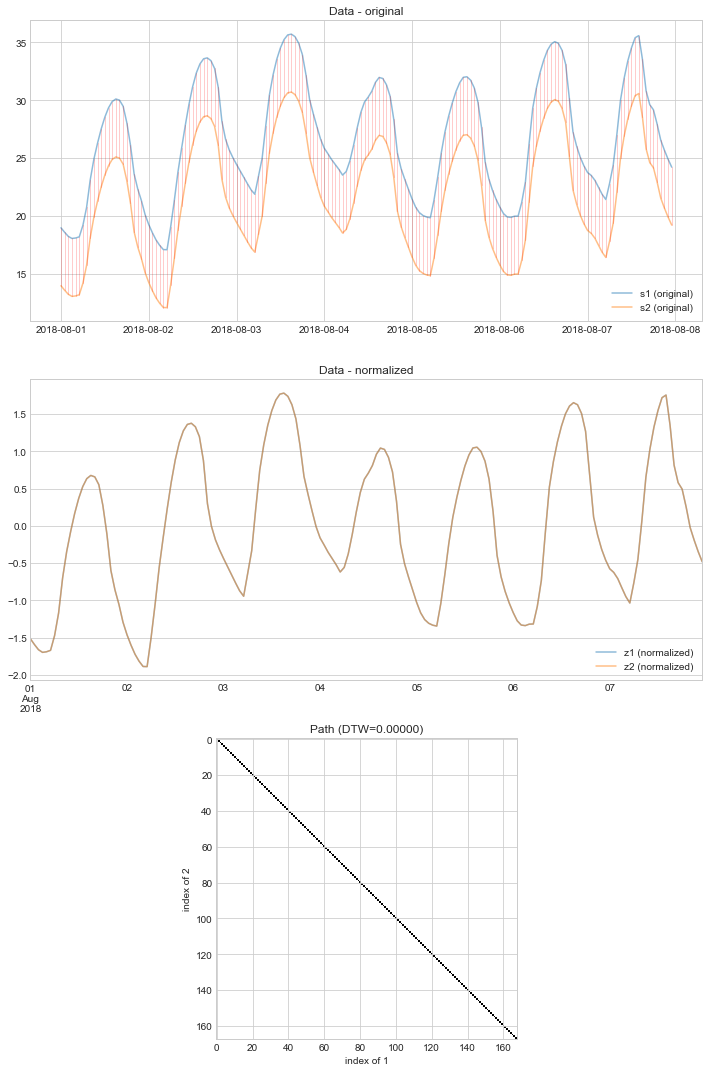

Score DTW: 0.00


In [13]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics


def dtw(s1: pd.Series, s2: pd.Series, plot: bool=True):
    """Dynamic Time Warping (DTW)
    
    References
    ----------
    Based on:
    https://tslearn.readthedocs.io/en/latest/auto_examples/plot_dtw.html
    
    """    
    # 1 - Normalize the time series
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
    z1 = scaler.fit_transform(s1.values)[0]
    z2 = scaler.fit_transform(s2.values)[0]
    
    # 2 - Compute DTW score, getting path as well
    path, score = metrics.dtw_path(s1=z1, s2=z2)
    
    # 3 - Plot
    if plot:

        # Auxiliar technical step to turn path pairs into a matrix
        assert z1.shape == z2.shape, 'Implemented for equal lengths'
        sz = len(z1)
        dtw_matrix = np.zeros((sz, sz), dtype=np.int)
        for i, j in path:
            dtw_matrix[i, j] = 1
            
        # Auxiliar technical step to reconstruct datetimes
        z1 = pd.Series(z1.T[0], s1.index)
        z2 = pd.Series(z2.T[0], s2.index)
        
        # Plot
        fig, (ax0, ax1, ax2) = plt.subplots(figsize=(10, 15), nrows=3)
        
        # Plot original data
        ax0.plot(s1, alpha=0.5, label='s1 (original)')
        ax0.plot(s2, alpha=0.5, label='s2 (original)')
        ax0.set_title('Data - original')
        ax0.set_xlabel('')        
        ax0.legend(loc='lower right')
        # - Add segments
        for (i, j) in path:
            _x = [mpl.dates.date2num(i.to_pydatetime())
                  for i in [s1.index[i], s2.index[j]]]
            _y = [s1.iloc[i], s2.iloc[j]]
            ax0.plot(_x, _y, color='r', lw=1, alpha=0.2) 
        
        # Plot transformed data
        z1.plot(ax=ax1, alpha=0.5, label='z1 (normalized)')
        z2.plot(ax=ax1, alpha=0.5, label='z2 (normalized)')
        ax1.set_title(f'Data - normalized')
        ax1.set_xlabel('')
        ax1.legend(loc='lower right')
        
        ax2.imshow(dtw_matrix, cmap="gray_r")
        ax2.set_title(f'Path (DTW={score:.5f})')
        ax2.set_xlabel('index of 1')
        ax2.set_ylabel('index of 2')        
        
        plt.tight_layout()
        plt.show()
        
    return score


# Base data
dates = slice('2018-08-01', '2018-08-07')
s_base = df_gbr.loc[dates, 'drybulb']
# - sample data 1: offset the base previous by 5 °C
s_off1 = df_gbr.loc[dates, 'drybulb'] + 5

# Comparison
score = dtw(s1=s_off1, s2=s_base)
print(f'Score DTW: {score:.2f}')

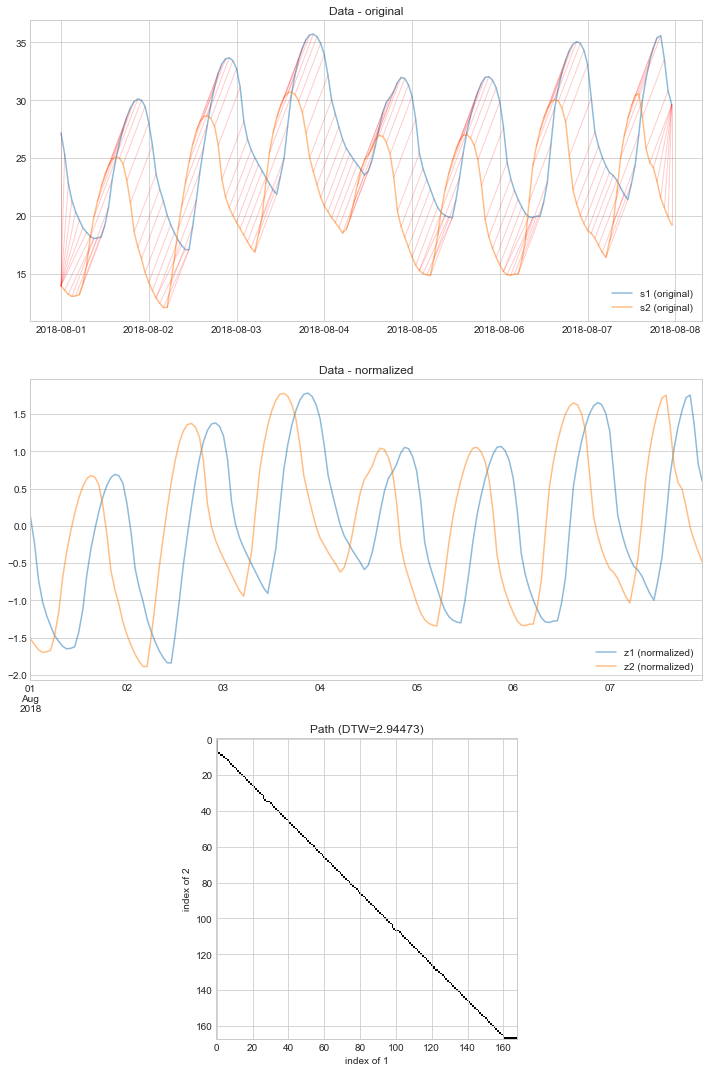

Score DTW: 2.94


In [14]:
# Base data
s_base = df_gbr.loc[dates, 'drybulb']
# - sample data 2: move back 6 hours and offset by 5 °C
s_lag1 = df_gbr.shift(6).loc[dates, 'drybulb'] + 5

# Comparison
score = dtw(s1=s_lag1, s2=s_base)
print(f'Score DTW: {score:.2f}')

## Correlations

In [15]:
df_gbr.corr(method='pearson')

drybulb    relhum  glohorrad  rainfall   windspd   winddir
drybulb    1.000000 -0.645485   0.614725 -0.053108 -0.130000  0.014222
relhum    -0.645485  1.000000  -0.814410  0.112781 -0.088096  0.050040
glohorrad  0.614725 -0.814410   1.000000 -0.088324  0.015169 -0.053720
rainfall  -0.053108  0.112781  -0.088324  1.000000  0.155841 -0.010164
windspd   -0.130000 -0.088096   0.015169  0.155841  1.000000  0.064339
winddir    0.014222  0.050040  -0.053720 -0.010164  0.064339  1.000000

In [16]:
df_gbr.corr(method='pearson').style.background_gradient(cmap='viridis')

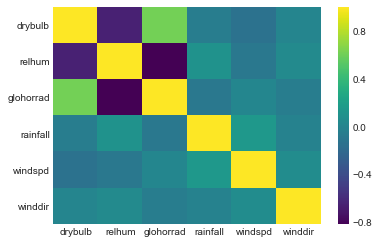

In [17]:
import seaborn as sns

corr = df_gbr.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='viridis')
plt.show()

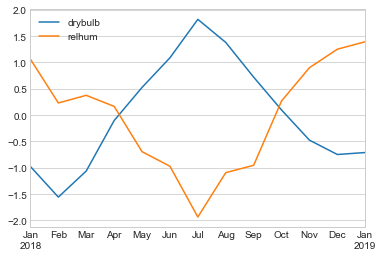

In [18]:
from scipy.stats import zscore


fig, ax = plt.subplots()
(
    # Select data
    df_gbr[['drybulb', 'relhum']]
    # Aggregate by month (for instance) to clarify visual relationships
    .resample('M').mean()
    # Normalize to display in same units
    .apply(zscore)
    # Plot
    .plot(ax=ax)
)
plt.show()

## Activities